# Training Models

## Linear Regression

##y= theta0+theta1*x1+ theta2*x2+....= h(theta)x= (theta)^T .x

### Training a model- minimize the cost function- MSE or RMSE

#### The task is the find theta that minimizes the cost function

In [ ]:
#Normal Equation

In [7]:
# generate some data
import numpy as np

In [10]:
X= np.random.randn(100,1)

In [11]:
y=4+3*X+ np.random.randn(100,1)

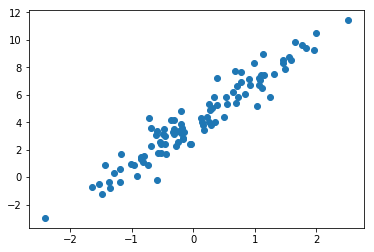

In [6]:

%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.show()

In [7]:
# find theta. 
# 1) use NumPy's matrix inverse function.
# 2) use dot method for matrix multiply.


# Normal Equation: theta hat= (X^T.X)^-1.X^T.y

In [12]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# results:
print(theta_best) # compare to generated data: y = 4 + 3x + noise

[[ 4.03462199]
 [ 2.94846064]]


In [9]:
# make some predictions

X_new     = np.array([[0],[1],[2]])
X_new_b   = np.c_[np.ones((3, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
print(y_predict)


[[ 3.98095232]
 [ 6.94738973]
 [ 9.91382714]]


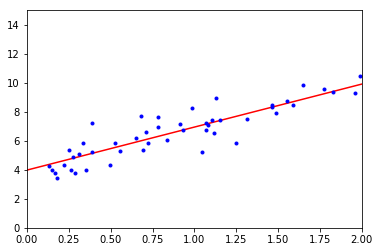

In [10]:
# then plot

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

All the above can be achieved using Scikit equivalent

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [12]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
lin_reg.intercept_, lin_reg.coef_

(array([ 3.98095232]), array([[ 2.96643741]]))

In [14]:
lin_reg.predict(X_new)

array([[ 3.98095232],
       [ 6.94738973],
       [ 9.91382714]])

# #Computational Complexity

##The complexity of this normal equation is O(n^3). 

# Gradient Descent

##The general idea of gradient descent is to tweak parameters so that it maximizes the cost function. The idea is you start with a random theta, then you take baby steps and at each step, the goal is to decrease the cost function untill the algorithm converges to minimum. An important point in gradient descent is the size of steps to take. If the size of steps is too less, the algorithm will go through several iterations.

To use gradient descent, it is important to have all the features on the same scale

###MSE cost function= 1/m(theta^T.x(i)-y(i))^2


partial derivate of MSE= 2/m(theta^T. x(i)-y(i))x

or 

 gradient= 2/m X^T.(X.theta-y)

Theta= Theta - learningrate* gradient

Implementation of Gradient descent

In [3]:
learningrate= 0.1

In [4]:
n_iterations=1000

In [5]:
m=100

In [9]:
theta= np.random.randn(2,1)
theta

array([[ 0.76523694],
       [-0.28929091]])

In [13]:
X= np.random.randn(100,1)

In [14]:
X_b = np.c_[np.ones((100, 1)), X]

In [15]:
y=4+3*X+ np.random.randn(100,1)

In [17]:
for iterations in range(n_iterations):
    gradient= 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta= theta-learningrate*gradient

In [18]:
theta

#This value of theta is the same as we received when we used when we used normal equation

array([[ 4.01877473],
       [ 3.06721401]])

##Use grid search to find the best learning rate

# Converange rate for gradient descent is O(1/iterations)

# Stochastic Gradient Descent

The problem with batch gradient descent is it uses compelte training set to compute gradient at each step. This results in a slow implementation when training set is large.

Stochastic gradient descent comes to rescue. It picks a random instance of training set at every step and computes the gradient descent. It helps when the training set is huge.
The side effect is since it's picking random training data, instead of gently decreasing until it reaches a minimum, the cost function bounces up and down.


Lets implement Stochastic Gradient Descent
# Gradient Descent - Stochastic
# Stochastic: finds gradients based on random instances
# adv: better for huge datasets
# dis: much more erratic than batch GD 
#      -- good for avoiding local minima
#      -- bad b/c may not find optimum sol'n

# simulated annealing helps. (gradually reduces learning rat

In [21]:
theta_path_sgd=[]

n_epochs,t0,t1=50,5,50

def learning_schedule(t):
    return t0/(t+t1)
theta= np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index= np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradient= 2/m * X_b.T.dot(X_b.dot(theta)-y)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradient
        theta_path_sgd.append(theta)
print(theta)
        
        

[[ 4.01877473]
 [ 3.06721401]]
